In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from backtester import BackTester

%load_ext autoreload
%autoreload 2

In [11]:
bt = BackTester("prices_train.txt")

In [12]:
df = pd.DataFrame(bt.data.T)

In [13]:
df.describe()

0           1           2           3           4           5   \
count  600.000000  600.000000  600.000000  600.000000  600.000000  600.000000   
mean    35.450617   60.746917   55.687867   32.978533   57.027783   29.601600   
std      1.515860    4.172990    6.491555    2.252823    5.452457    1.847566   
min     32.690000   53.670000   42.390000   27.530000   47.700000   25.830000   
25%     34.100000   57.780000   48.837500   31.555000   51.225000   28.347500   
50%     35.250000   59.590000   57.285000   32.815000   57.845000   29.175000   
75%     36.807500   63.132500   61.202500   34.372500   61.400000   30.910000   
max     38.800000   70.770000   67.510000   37.880000   66.680000   33.900000   

              6           7           8           9   ...          40  \
count  600.00000  600.000000  600.000000  600.000000  ...  600.000000   
mean    28.23375   52.686817   37.836000   75.669950  ...   75.501750   
std      4.61282    5.499512    2.586307    9.390193  ...    3.067577   
min     19.95000   41.560000   32.990000   58.150000  ...   68.880000   
25%     24.26000   47.915000   35.657500   66.500000  ...   73.092500   
50%     28.26500   51.925000   37.670000   76.655000  ...   75.775000   
75%     31.44500   57.145000   39.785000   84.140000  ...   77.597500   
max     37.37000   65.140000   45.550000   92.500000  ...   83.120000   

               41          42          43          44          45          46  \
count  600.000000  600.000000  600.000000  600.000000  600.000000  600.000000   
mean    47.837467   34.510533   32.324333   78.497867   28.306683   72.114550   
std      4.453736    2.169572    3.359584    3.602673    0.602573    4.101971   
min     39.670000   30.040000   26.430000   69.360000   27.080000   64.830000   
25%     43.880000   33.025000   29.877500   75.790000   27.870000   69.107500   
50%     48.535000   34.705000   32.505000   79.245000   28.295000   71.280000   
75%     51.310000   35.692500   33.882500   81.190000   28.770000   74.135000   
max     57.270000   40.130000   40.290000   86.690000   29.720000   85.210000   

               47          48         49  
count  600.000000  600.000000  600.00000  
mean    20.602967   78.440767   30.33380  
std      2.687559    1.884826    1.72947  
min     16.950000   72.820000   26.41000  
25%     18.165000   77.267500   29.20750  
50%     19.950000   78.800000   30.69500  
75%     23.530000   79.610000   31.71000  
max     24.960000   83.170000   33.27000  

[8 rows x 50 columns]

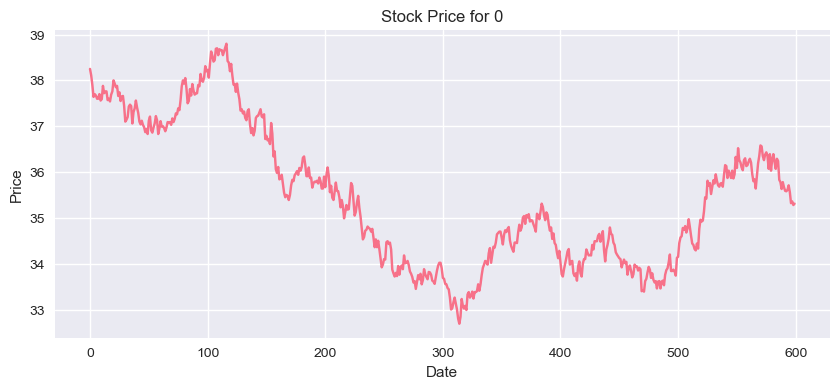

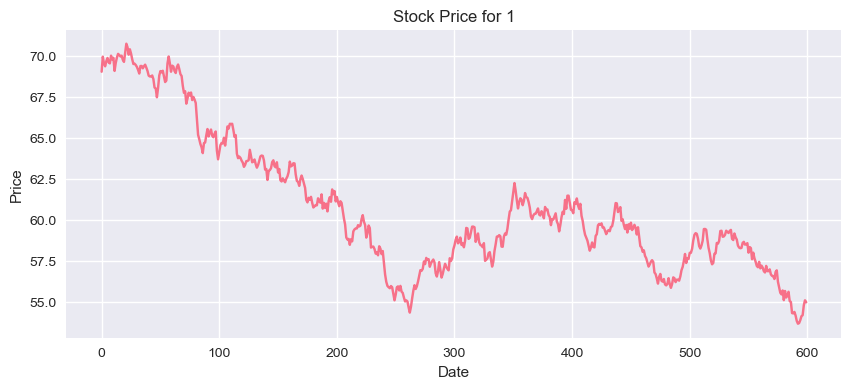

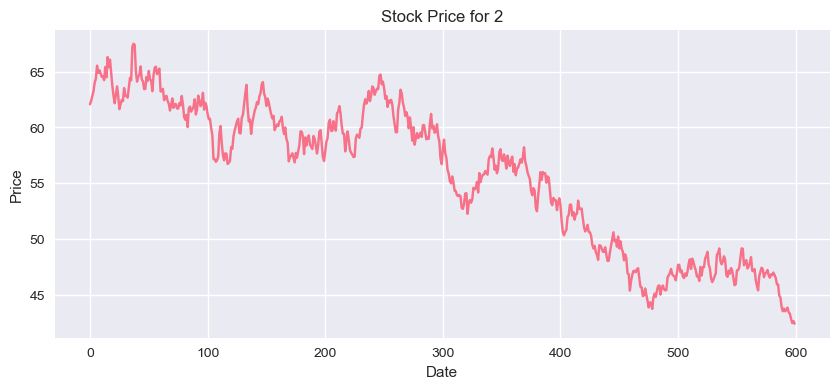

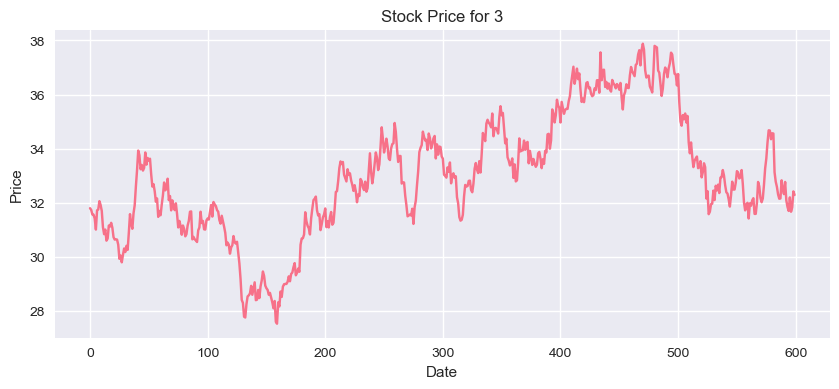

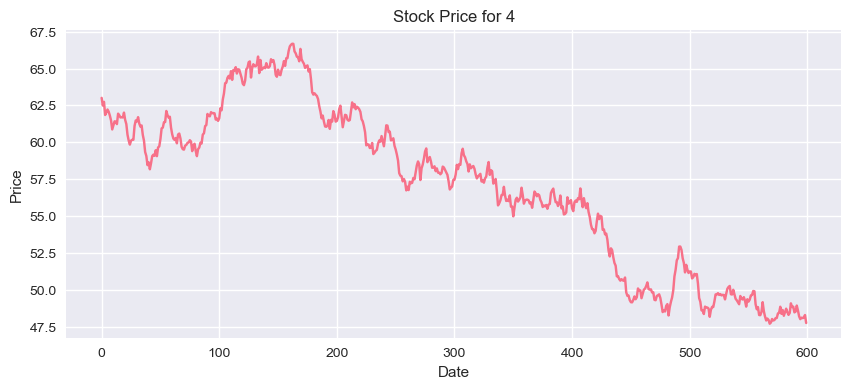

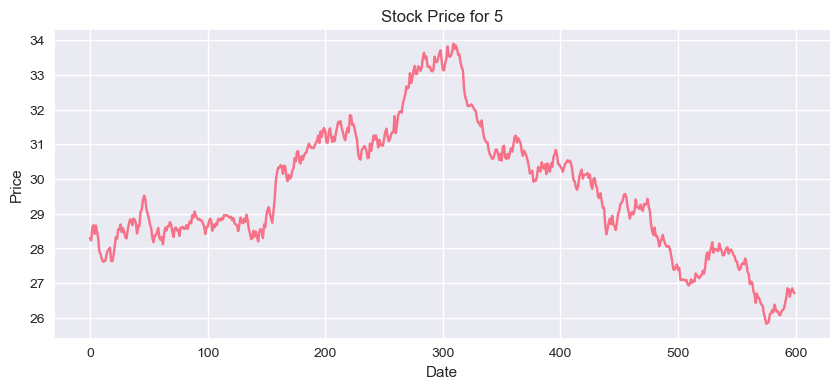

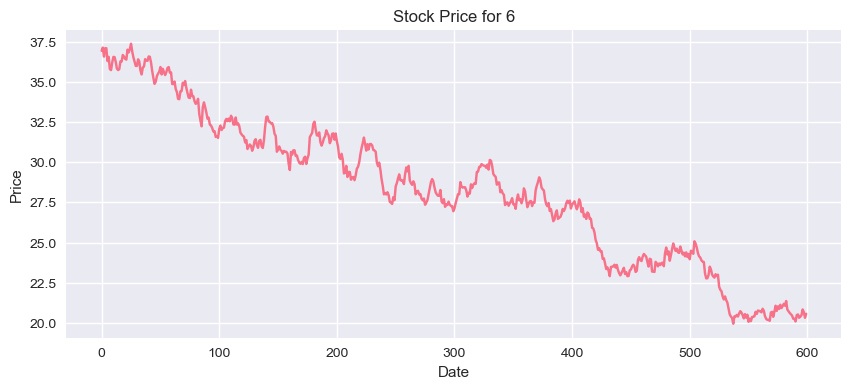

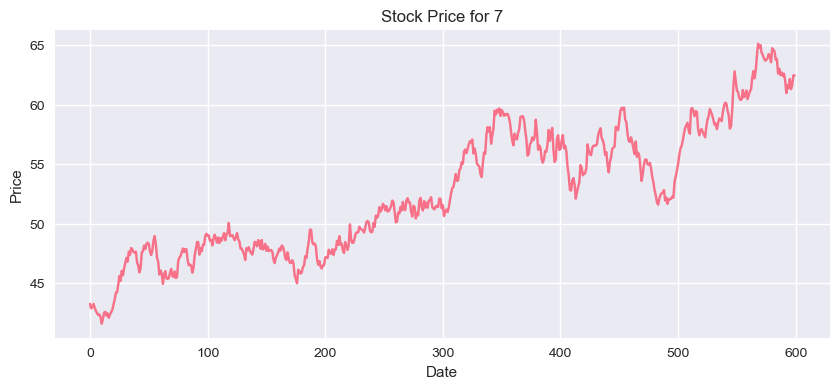

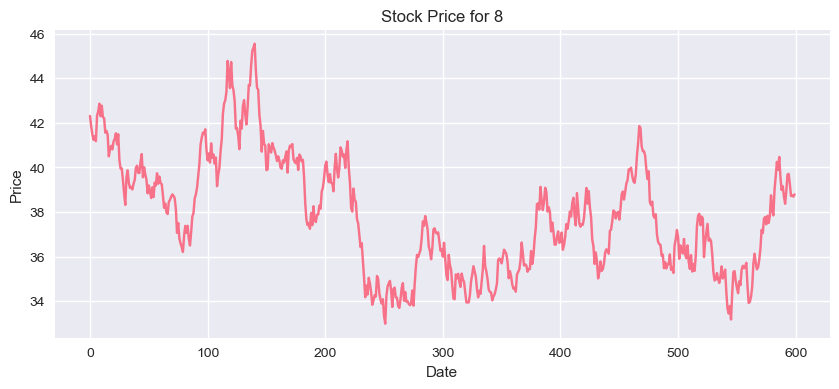

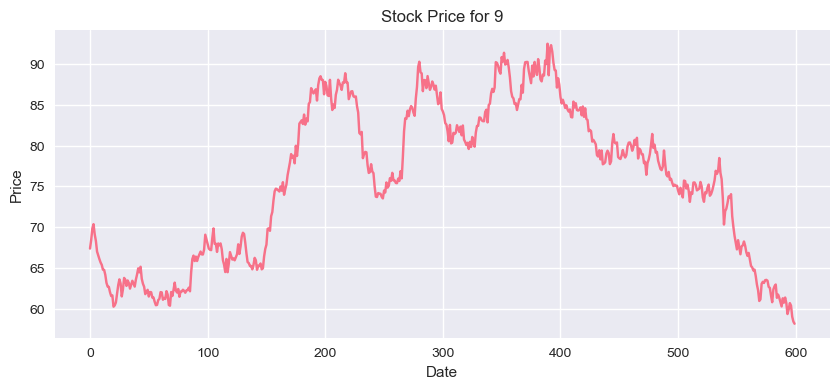

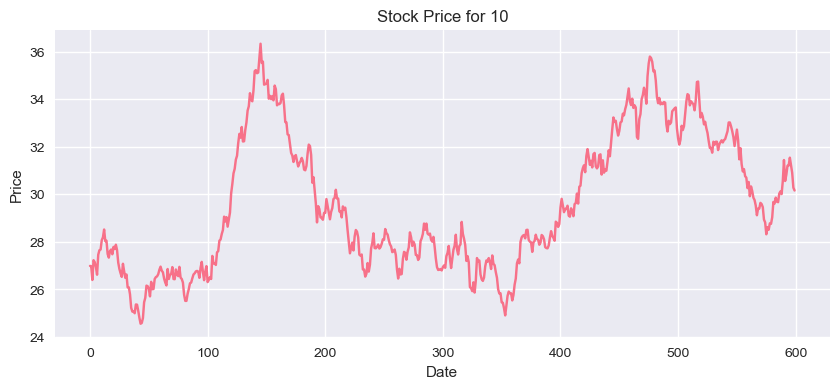

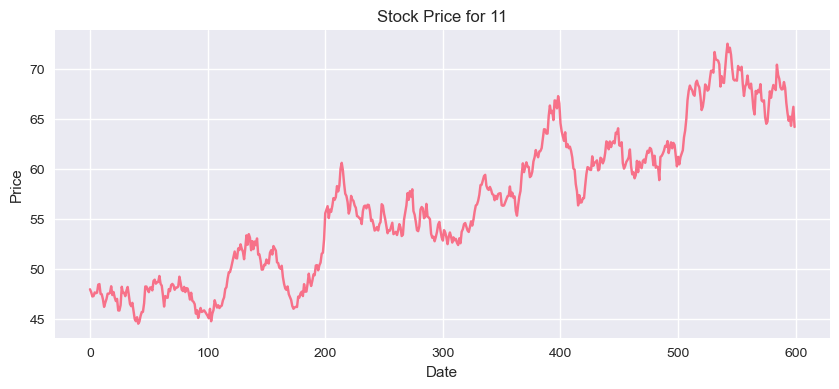

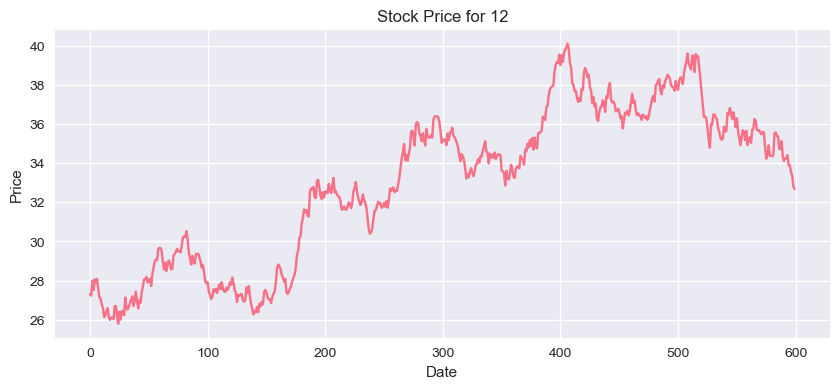

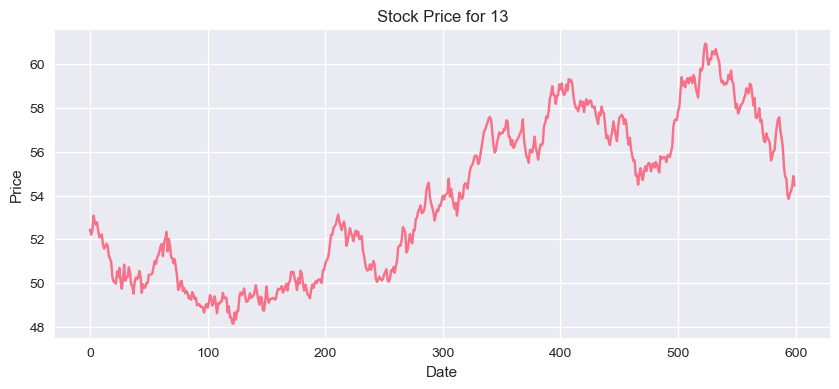

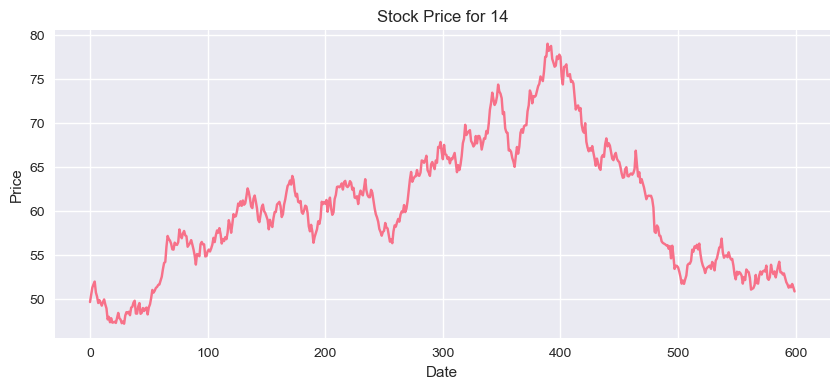

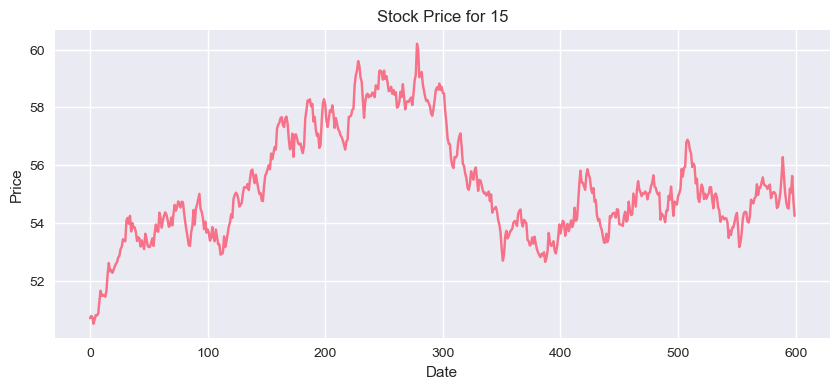

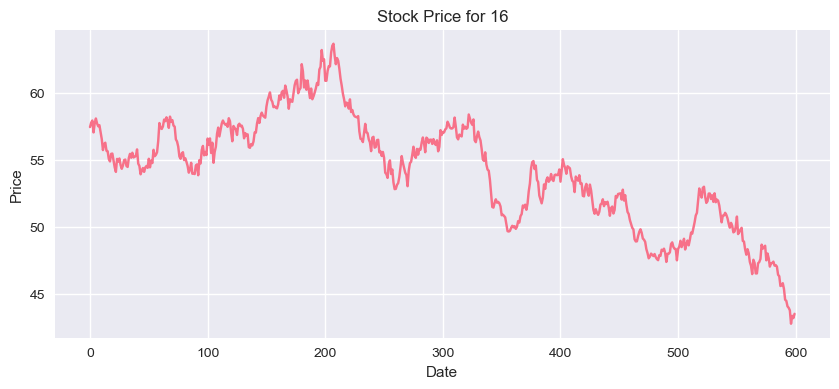

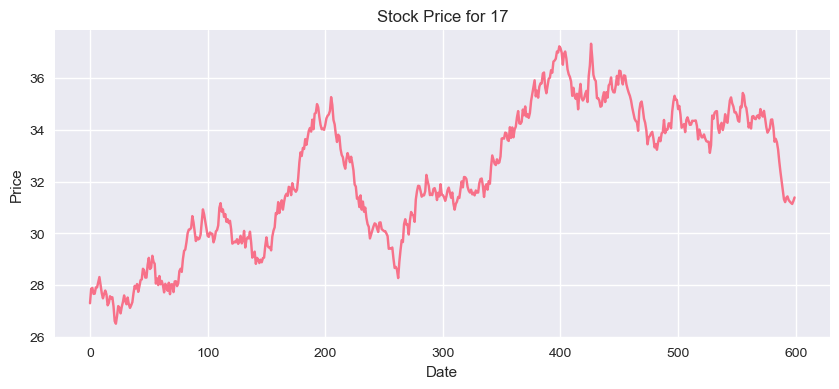

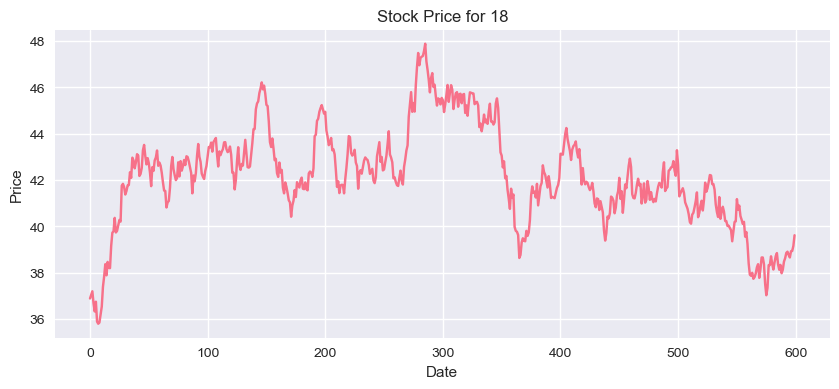

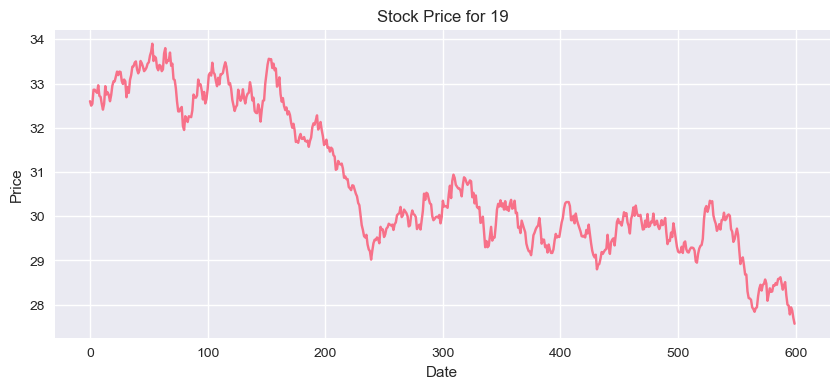

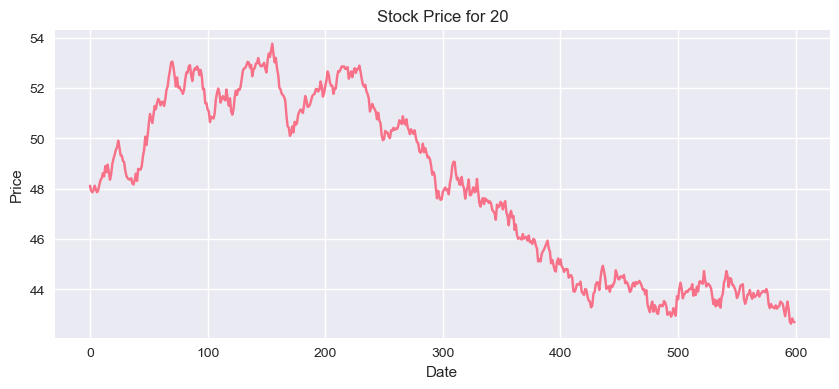

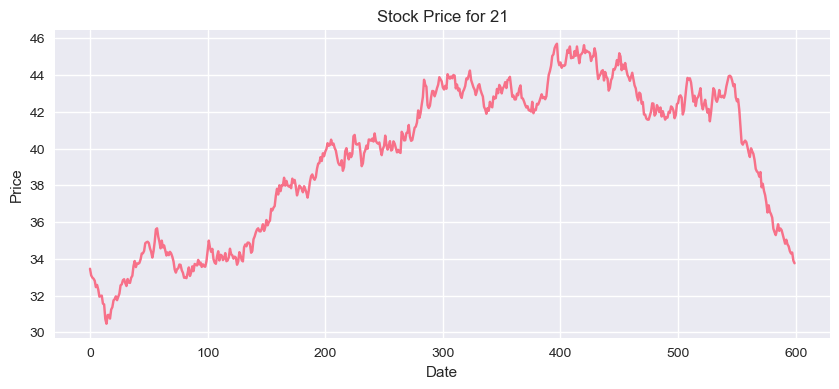

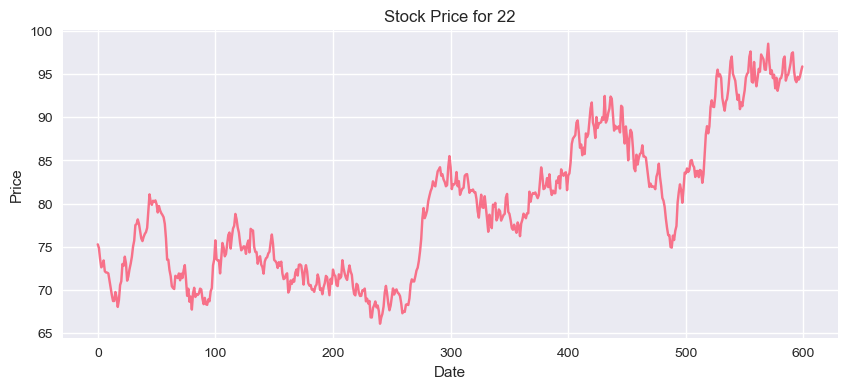

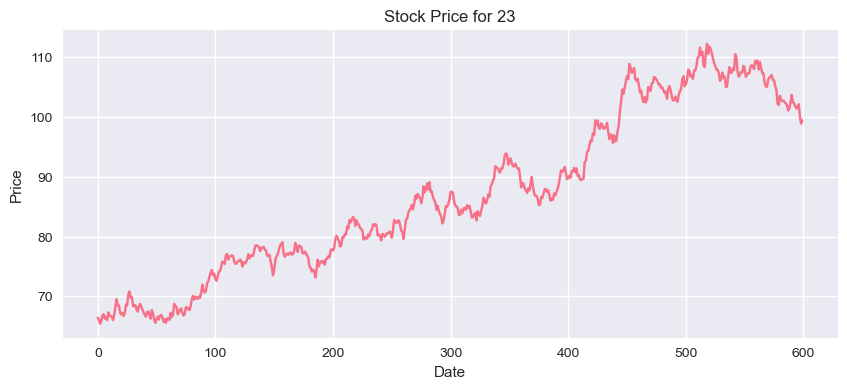

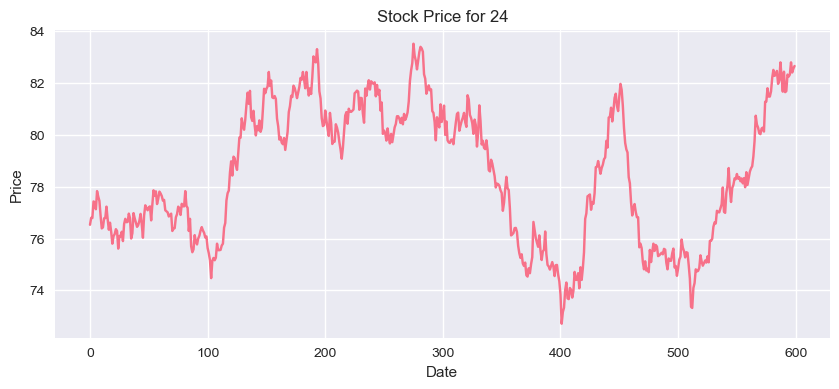

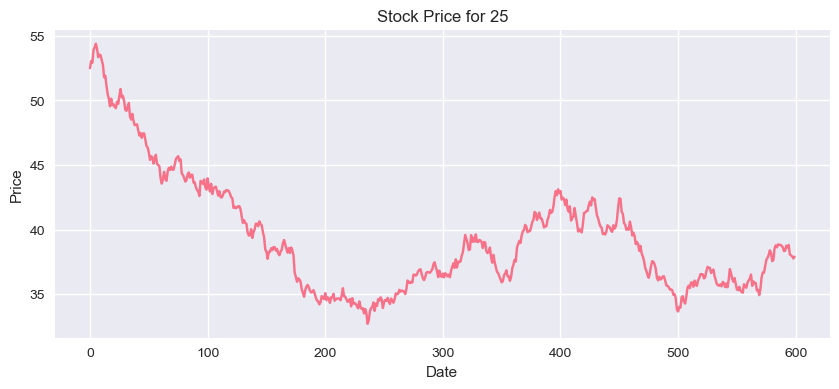

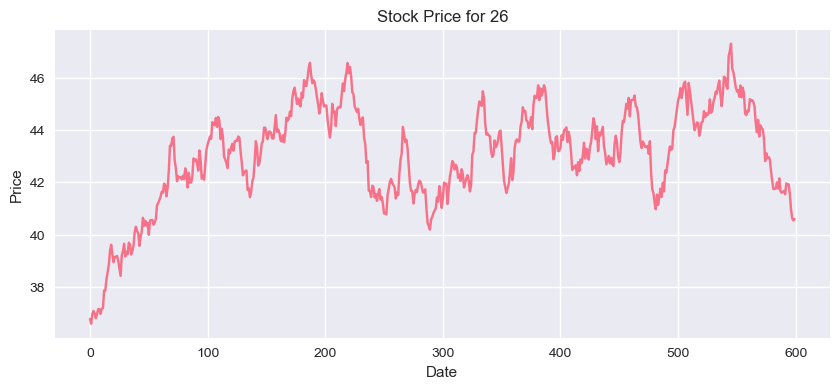

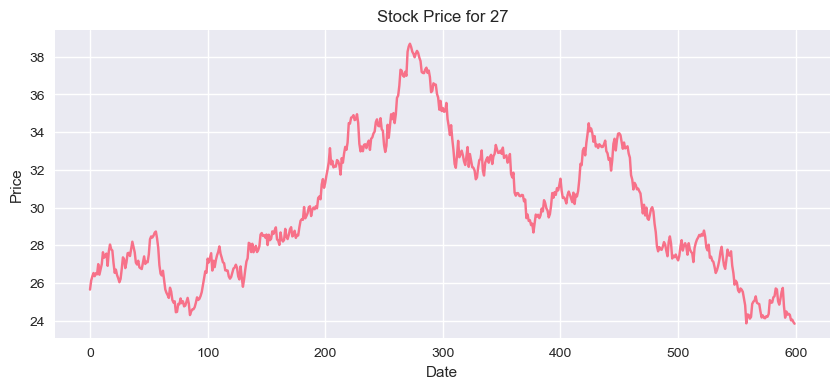

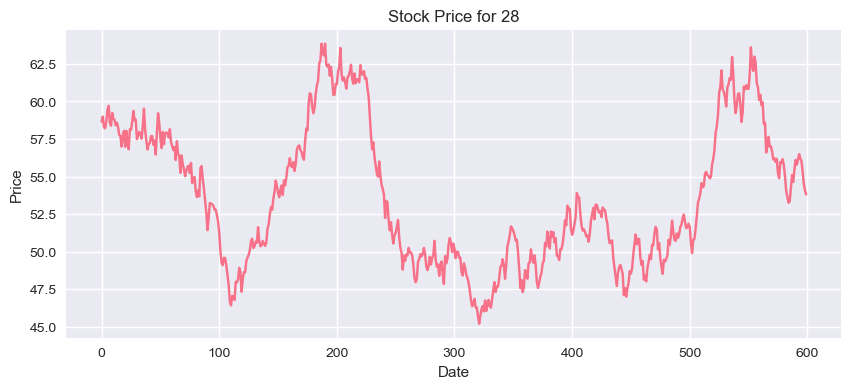

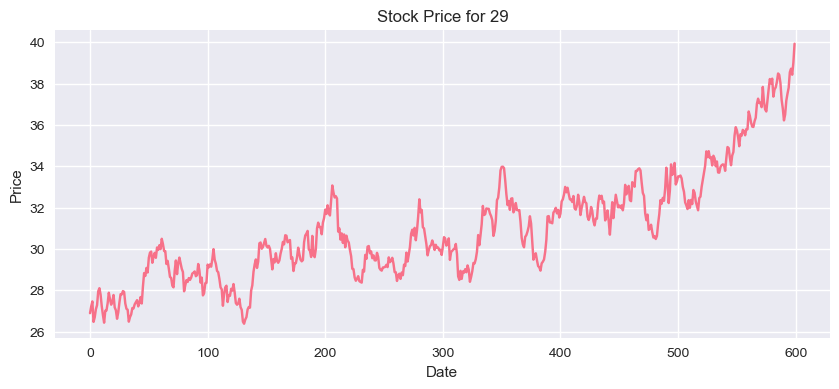

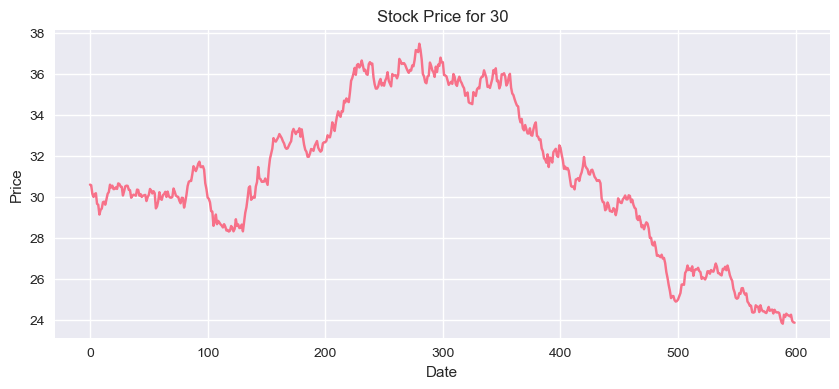

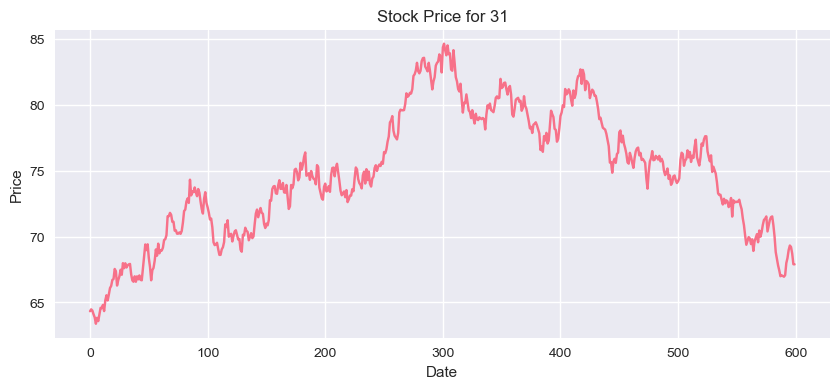

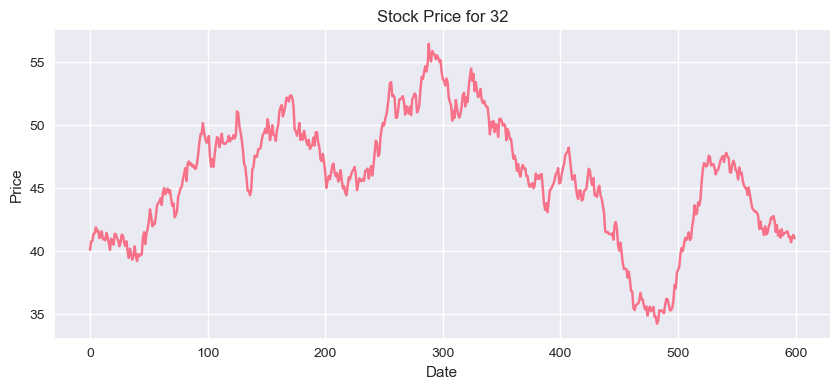

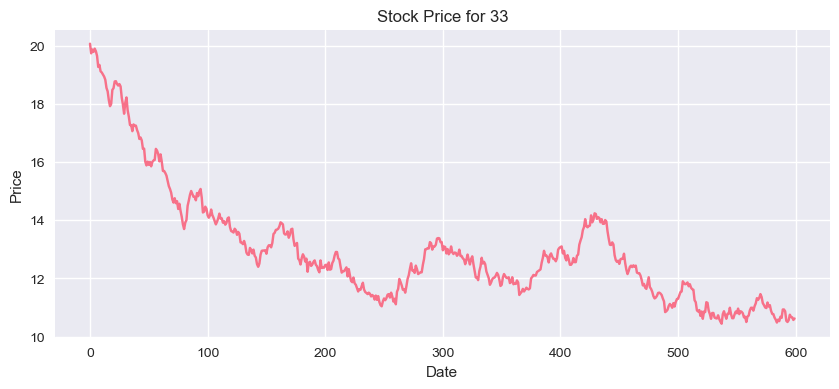

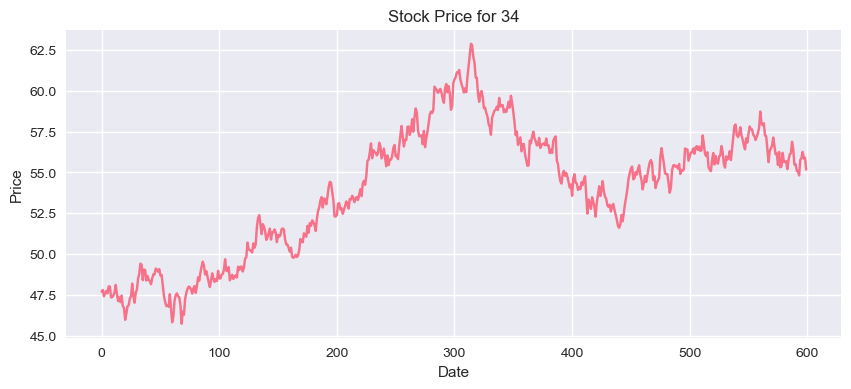

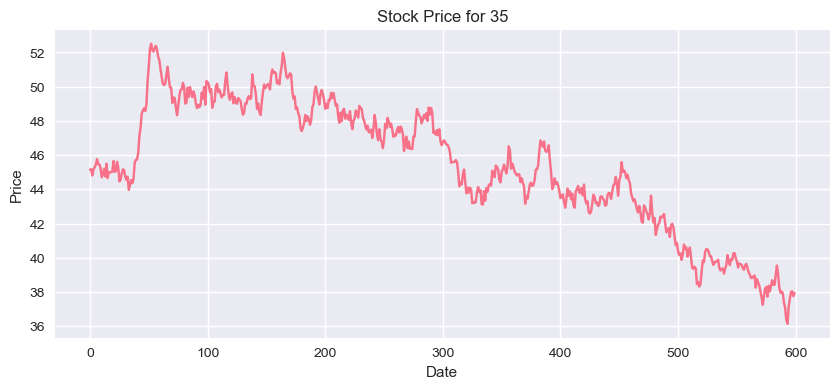

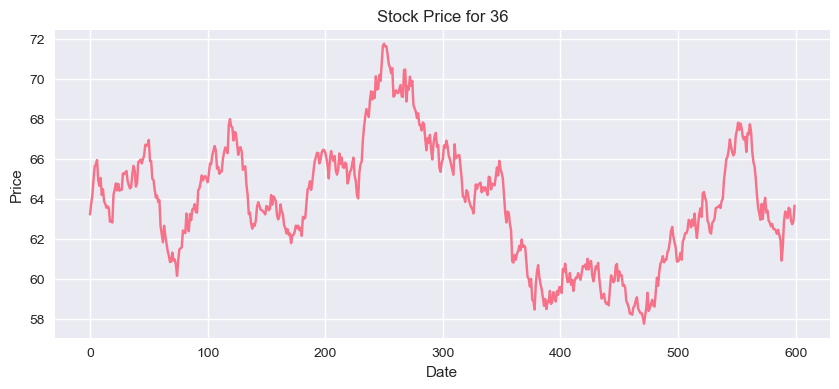

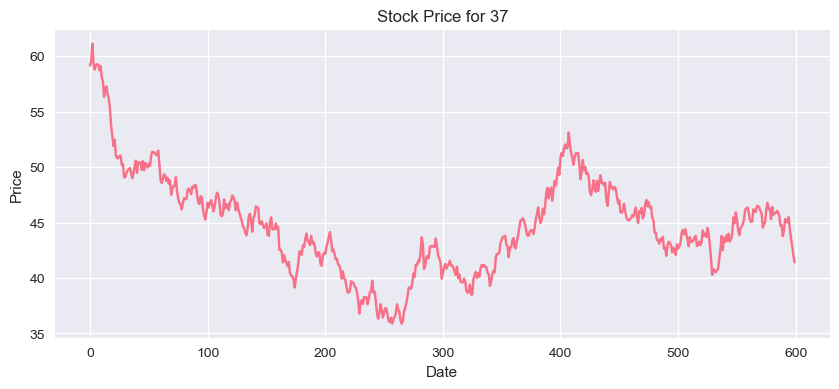

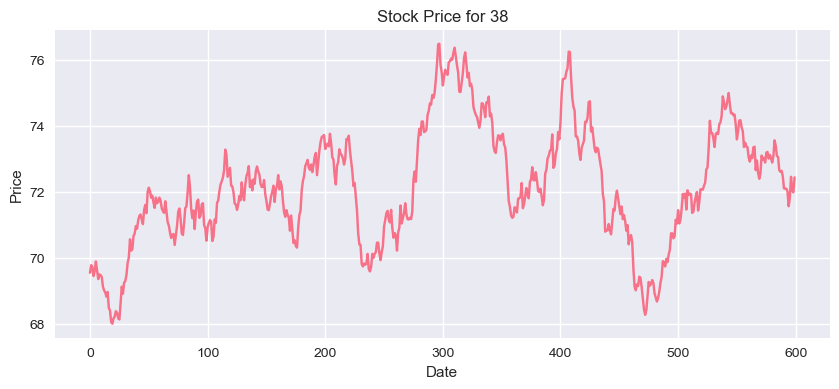

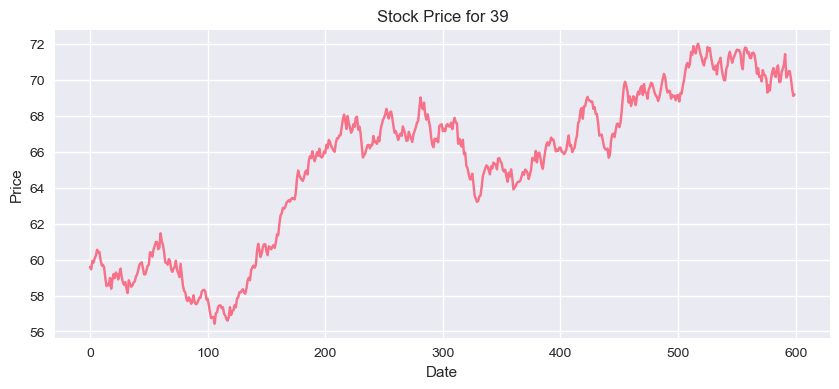

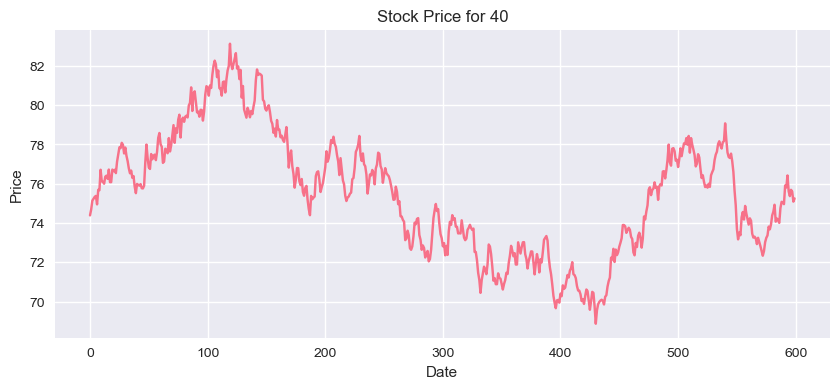

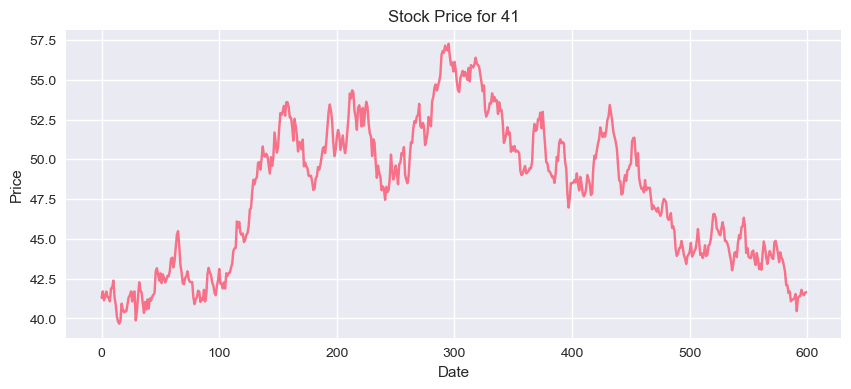

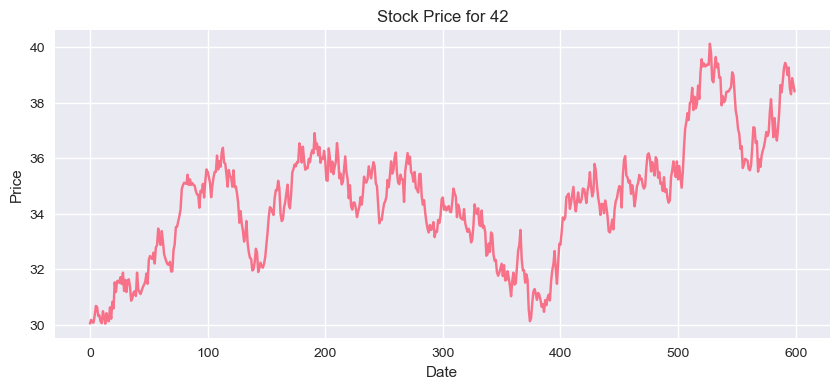

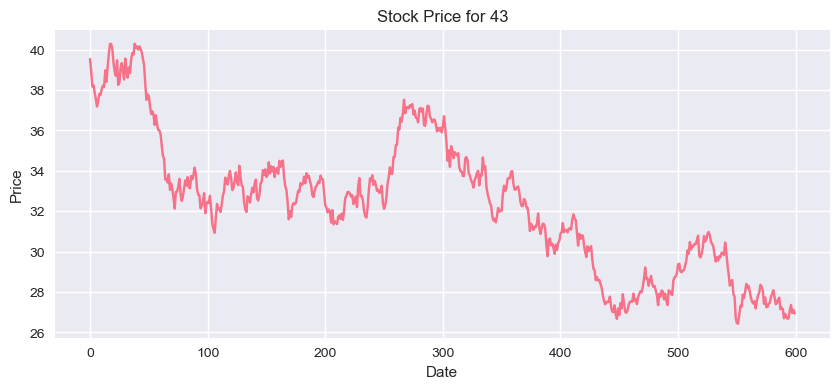

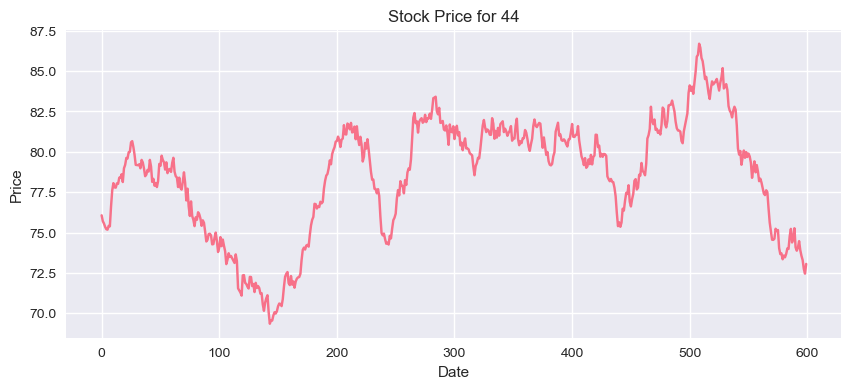

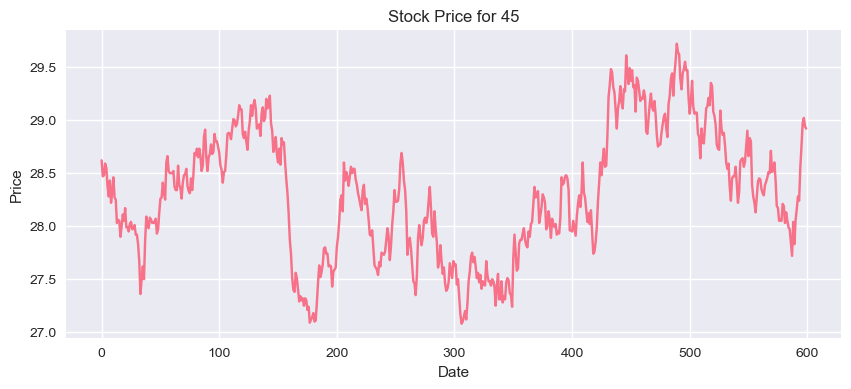

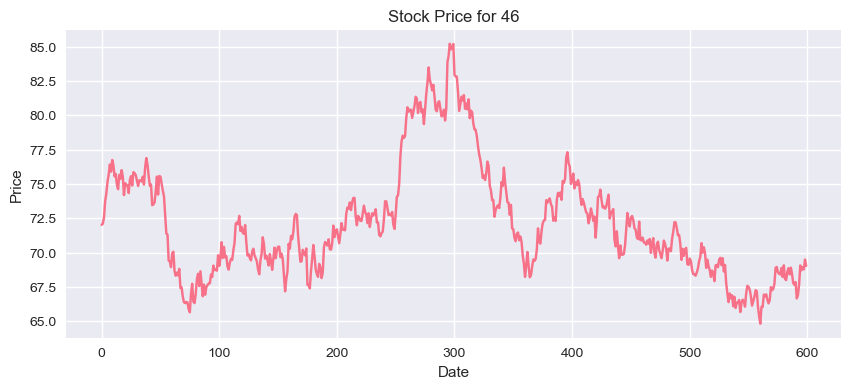

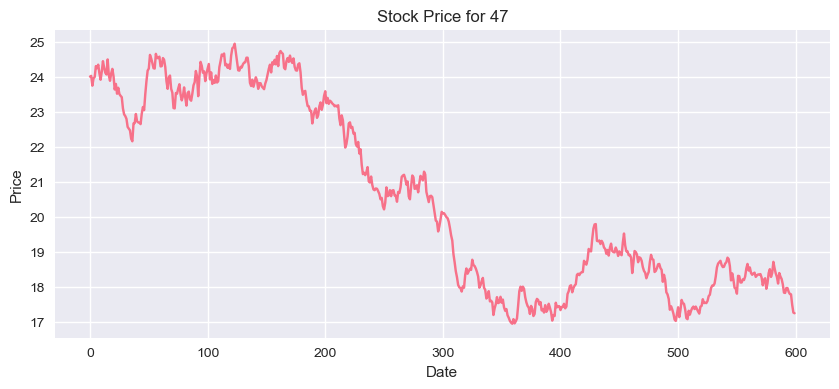

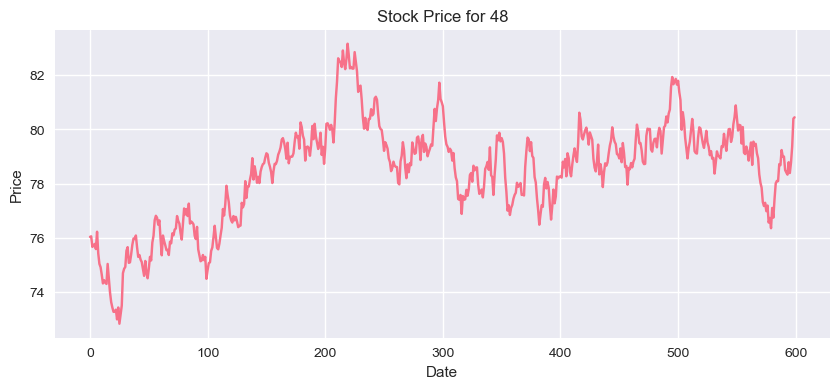

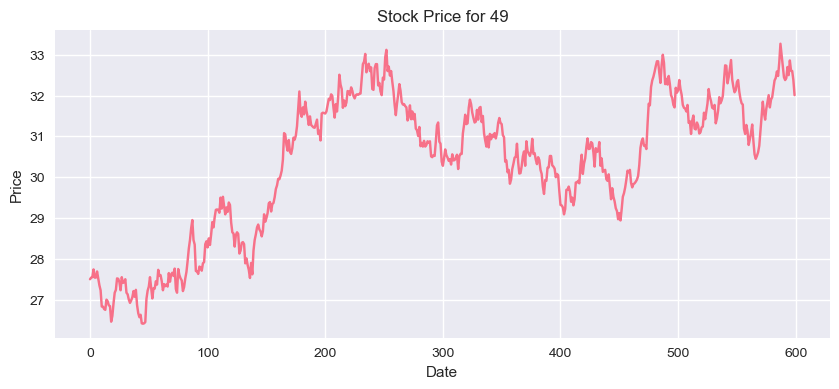

In [14]:
# Assuming your DataFrame is named df
for col in df.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df[col])
    plt.title(f"Stock Price for {col}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.show()

In [18]:
# Import the functions
from mean_reversion_backtest import (
    backtest_mean_reversion_strategy,
    plot_instrument_analysis,
    plot_summary_statistics,
    plot_single_instrument,
    print_performance_summary,
    get_default_strategy_params,
)

In [19]:
# Step 2: Run the backtest to get all data
(
    backtester,
    daily_positions,
    daily_pnl,
    stats,
    daily_stock_profits,
    all_daily_positions,
    all_daily_stock_profits,
    price_data,
) = backtest_mean_reversion_strategy("prices_train.txt", num_test_days=400)

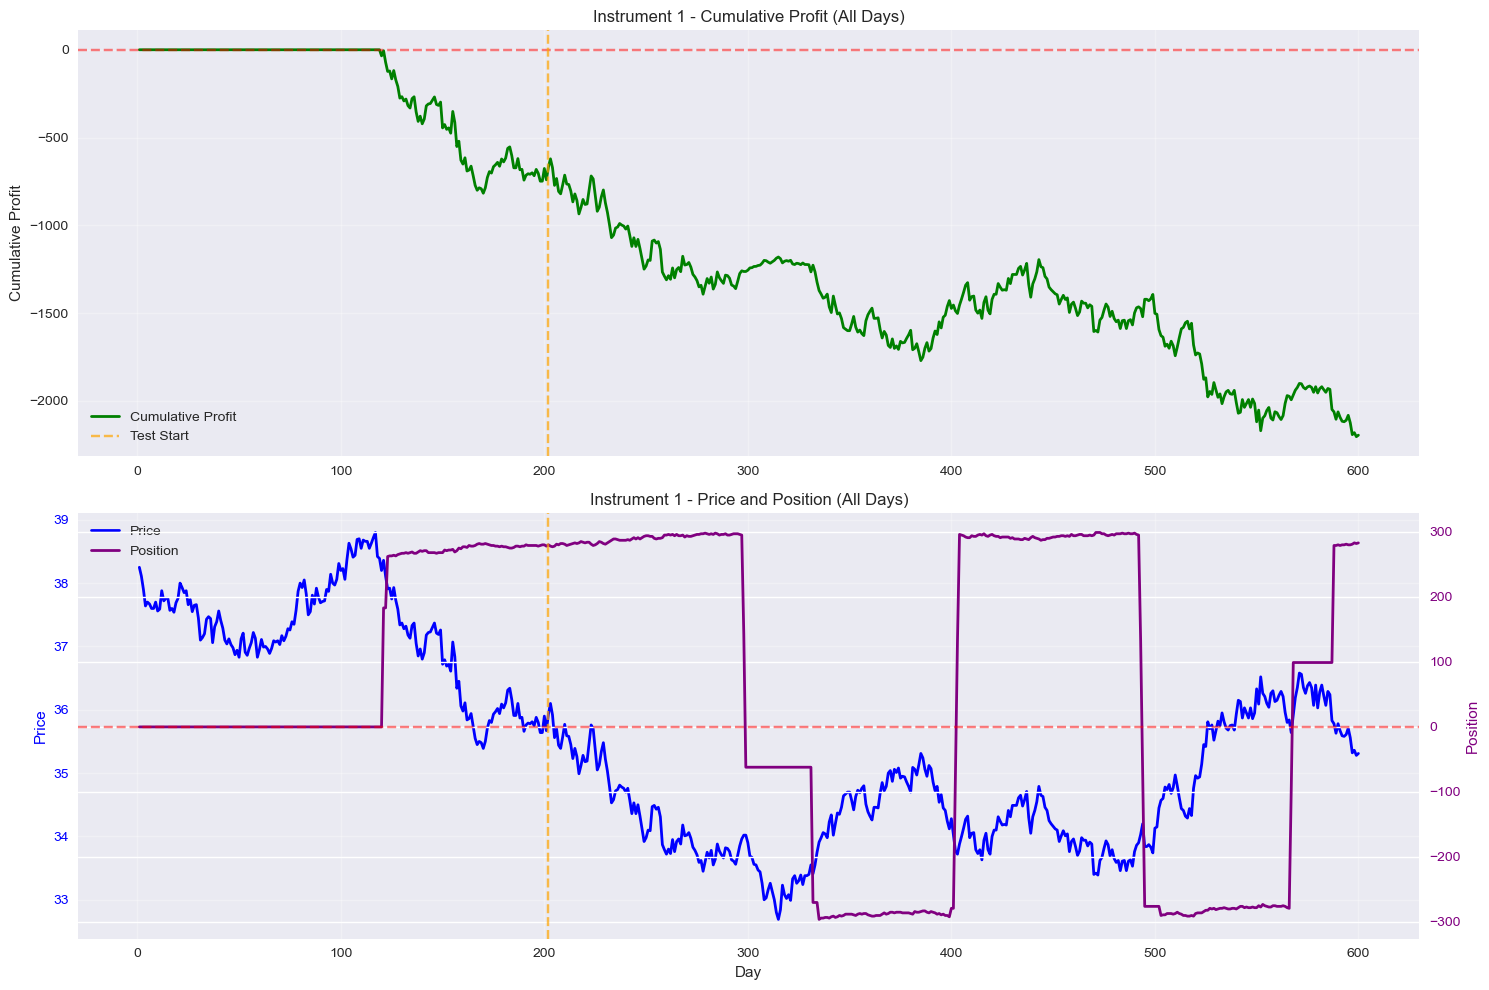

In [20]:
plot_single_instrument(
    all_daily_positions,
    all_daily_stock_profits,
    price_data,
    daily_pnl,
    instrument_idx=0,
)

# plot_instrument_analysis(daily_positions, daily_pnl, daily_stock_profits, price_data)

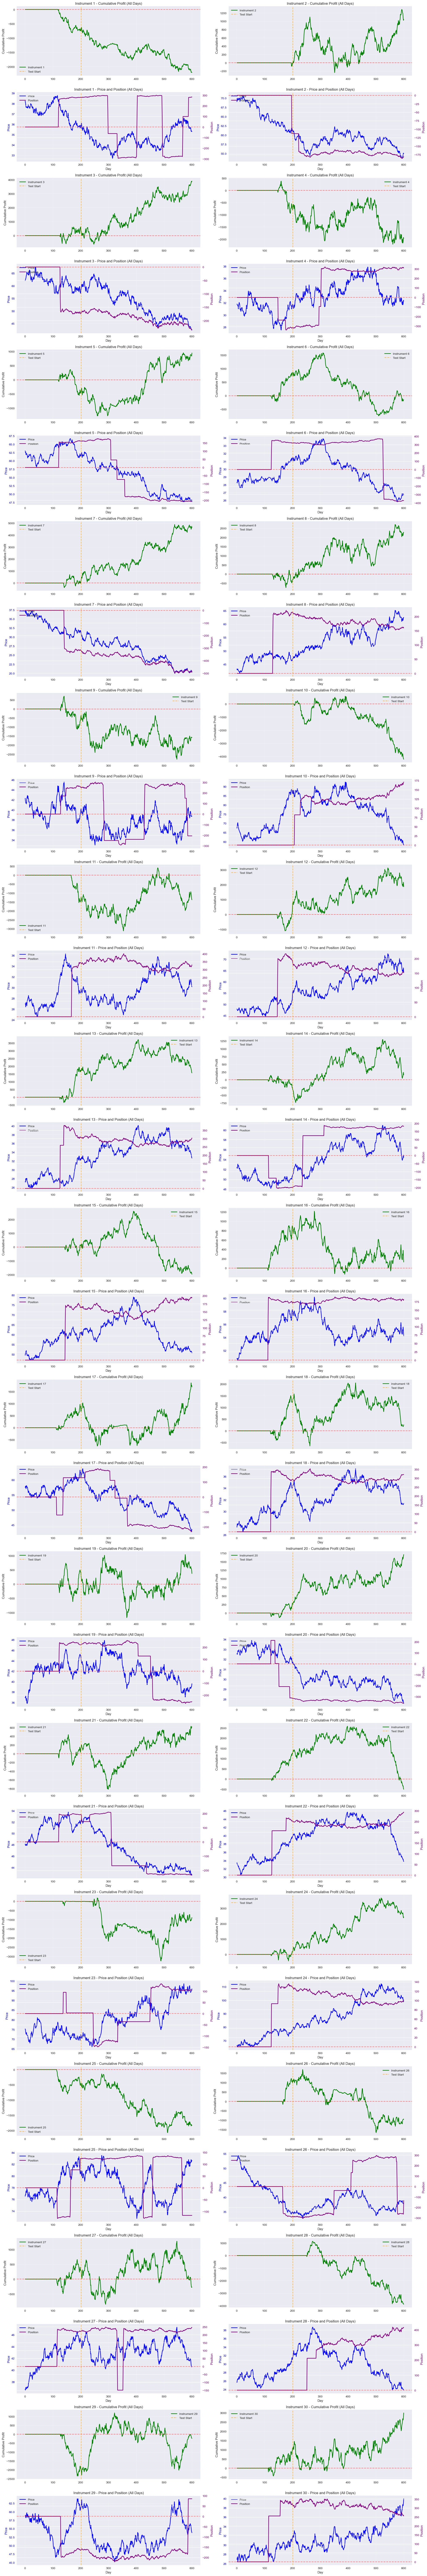

In [26]:
plot_instrument_analysis(
    all_daily_positions,
    daily_pnl,
    all_daily_stock_profits,
    price_data,
    num_instruments=30,
    save_plot=False,
)

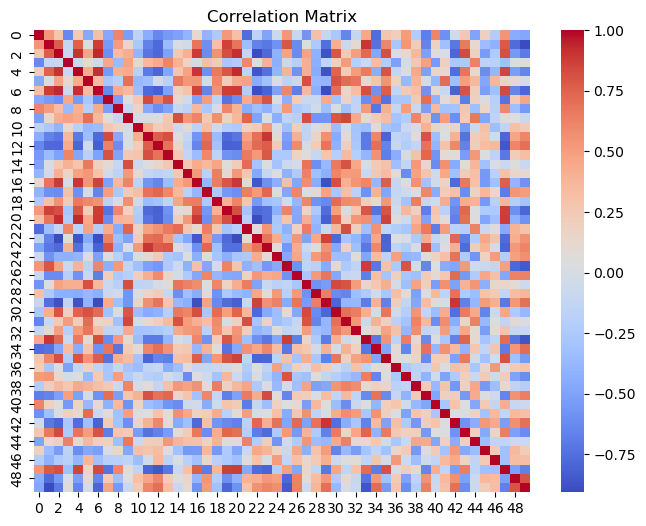

In [5]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [6]:
tester.data.shape

(50, 750)

In [7]:
def get_correlation_islands(data, corr_matrix, threshold):
    (n, _) = data.shape
    visited = [False for _ in range(n)]
    islands = []

    def dfs(u, cur_l):
        if visited[u]:
            return
        visited[u] = True
        cur_l.append(u)

        for v in range(n):
            if u == v or visited[v] or abs(corr_matrix[u][v]) < threshold:
                continue
            dfs(v, cur_l)

    for u in range(n):
        if visited[u]:
            continue
        cur_l = []
        dfs(u, cur_l)
        islands.append(cur_l)

    return [x for x in islands if len(x) > 1]

In [8]:
corr_islands = get_correlation_islands(tester.data, corr_matrix, 0.9)
print(len(corr_islands), [len(x) for x in corr_islands])

3 [2, 5, 2]


In [9]:
import plotly.graph_objs as go


def plot_selected_stocks_by_index(df, col_indices, isNormalised=True):
    """
    Plots selected columns by index from a pandas DataFrame using Plotly for interactivity.

    Parameters:
        df (pd.DataFrame): Your stock data.
        col_indices (list): List of integer column indices to plot.
        x (str or None): Column name to use for x-axis (e.g., 'Date'), or None to use index.
        title (str): Plot title.
    """
    fig = go.Figure()
    for idx in col_indices:
        col_name = df.columns[idx]
        x_data = df.index
        y_data = df.iloc[:, idx]
        if isNormalised:
            y_data = y_data / y_data.iloc[0]
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode="lines", name=str(col_name)))
    fig.update_layout(
        xaxis_title="Index",
        yaxis_title="Value",
        legend_title="Instrument",
        hovermode="x unified",
    )
    fig.show()

In [11]:
plot_selected_stocks_by_index(df, corr_islands[0])

In [18]:
plot_selected_stocks_by_index(df, [i for i in range(10)], False)